# Análisis de los parámetros temporales de un filtro
Se pretende estudiar la respuesta al escalon de un filtro y con eso determinar la calidad de un filtro.

In [34]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
from __future__ import division
import matplotlib.pyplot as plt

ones = np.ones(1)
zeros = np.zeros(400)
dirac = np.concatenate((zeros,ones,zeros), axis=0)

szeros = np.zeros(100)
sones = np.ones(100)
step = np.concatenate((szeros,sones),axis=0)


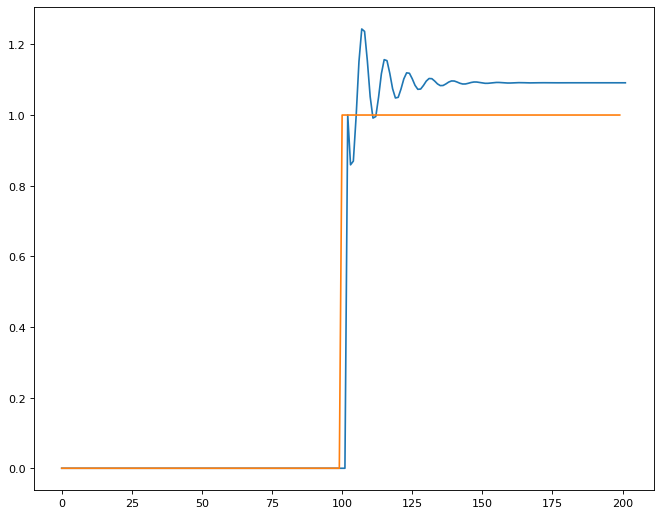

In [33]:
def notch_filter (signal):
    zeros = np.zeros(2)
    x = np.concatenate((zeros,signal), axis=0)
    y = np.zeros(len(signal)+2)
    for i in range (len(signal)):
        n = i+2 # Solo para facilitar la escritura
        y[n] = x[n] - 1.414* x[n-1] + x[n-2] + 1.273 * y[n-1] - 0.81 * y[n-2]
    return y

fig, ax = plt.subplots(num=None, figsize=(10, 8), dpi=80)
Nstep_resp = notch_filter(step)
ax.plot(Nstep_resp)
ax.plot(step)

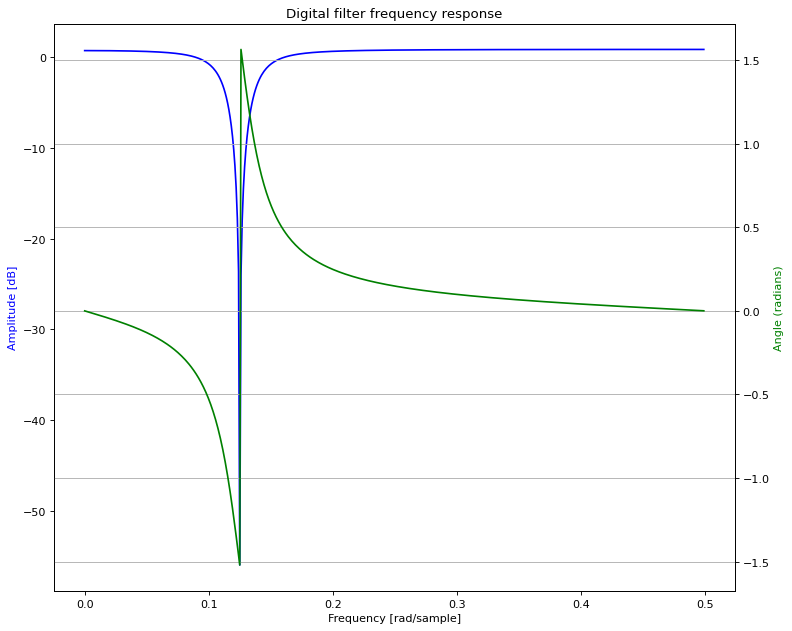

In [27]:
b = np.array([1,-1.414,1])
a = np.array([1,-1.273,0.81])
w, h = sig.freqz(b,a)
fig, ax = plt.subplots(num=None, figsize=(10, 8), dpi=80)
ax.set_title('Digital filter frequency response')
ax.plot(w/(2*np.pi), 20 * np.log10(abs(h)), 'b')
ax.set_ylabel('Amplitude [dB]', color='b')
ax.set_xlabel('Frequency [rad/sample]')
ax = ax.twinx()
angles = np.angle(h)
ax.plot(w/(2*np.pi), angles, 'g')
ax.set_ylabel('Angle (radians)', color='g')
ax.grid()
ax.axis('tight')

fig.tight_layout()

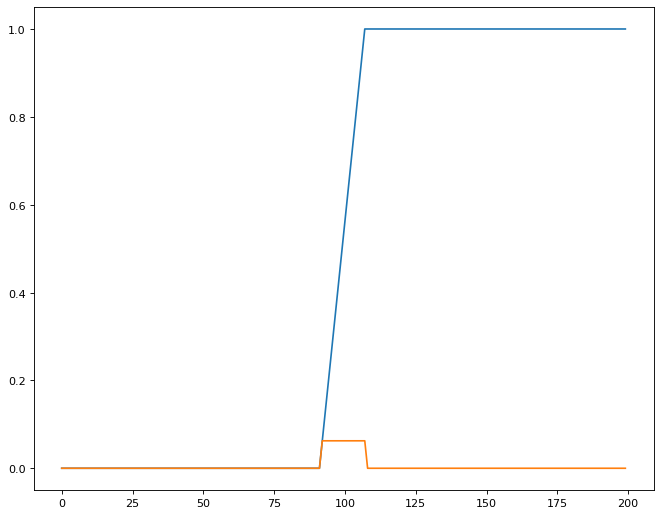

C:\Users\Axelukan\AppData\Local\Temp\ipykernel_19932\3431962435.py:23: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w/(2*np.pi), 20 * np.log10(abs(h)), 'b')


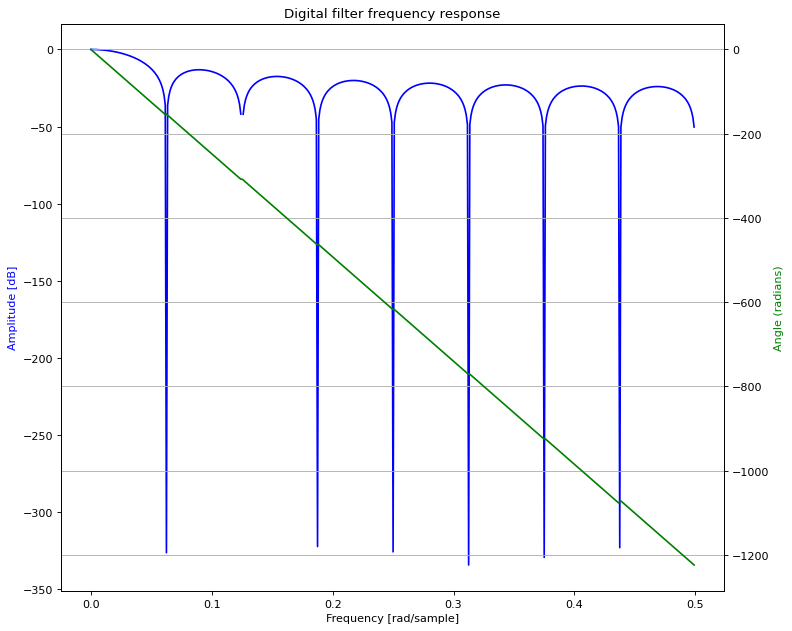

In [31]:
def mov_avg (signal, MVSIZE):
    avg = np.zeros(len(signal))
    for n in range(len(avg)):
        sum = 0
        d = 0
        for k in range (-(MVSIZE), MVSIZE):
            if ((n-k) > 0) and ((n-k) < (len(signal))):
                sum = sum + signal[(n-k)]
                d = d+1
        avg[n] = sum/d
    return avg
M = 8
step_resp = mov_avg (step, M)
fig, ax = plt.subplots(num=None, figsize=(10, 8), dpi=80)
ax.plot(step_resp)

dirac_resp = mov_avg(dirac, M)
plt.plot(dirac_resp[300:500])
plt.show()
w, h = sig.freqz(dirac_resp) # Solo tiene zeros este filtro FIR
fig, ax = plt.subplots(num=None, figsize=(10, 8), dpi=80)
ax.set_title('Digital filter frequency response')
ax.plot(w/(2*np.pi), 20 * np.log10(abs(h)), 'b')
ax.set_ylabel('Amplitude [dB]', color='b')
ax.set_xlabel('Frequency [rad/sample]')
ax = ax.twinx()
angles = np.unwrap(np.angle(h))
ax.plot(w/(2*np.pi), angles, 'g')
ax.set_ylabel('Angle (radians)', color='g')
ax.grid()
ax.axis('tight')

fig.tight_layout()